In [0]:
import nltk

In [0]:
#nltk.download_shell()

In [0]:
! git clone https://gitlab.com/rdika/nlp.git

fatal: destination path 'nlp' already exists and is not an empty directory.


In [0]:
! ls

nlp  sample_data


SMS Spam Detection

In this project we will use SMS Spam Collection Data Set from UCI Machine Learning Repository to determine wheter an SMS is a spam message or not.

The dataset consists of 5574 SMS messages that have  been classifies to be either a spam or a ham (normal text messages).

In [0]:
messages = [line.rstrip() for line in open ('nlp/SMSSpamCollection')]

In [0]:
print (len(messages))

5574


In [0]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [0]:
# print the first 10 of the sms 
for mess_no, message in enumerate (messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [0]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

The data is tab separated file where each coloumn is seperated by tab('\t').
We can use pandas to separate the data automatically by defining the separator = '\t'

In [0]:
import pandas as pd

In [0]:
messages = pd.read_csv('nlp/SMSSpamCollection', sep= '\t', names=['label', 'message'])
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [0]:
messages.tail()

label                                            message
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

In [0]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [0]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We can see that we have 4825 ham messages and 747 spam messages where the most frequent message for ham is 'Sorry, I'll call later' (30 times) and the most frequent spam message is 'Please call our customer ...' (4 times)




In [0]:
messages['Length'] = messages['message'].apply(len)
messages.head()

label                                            message  Length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Next, we want to see whether there are any features that can distinguished the spam messages and ham messages. We checked whether the length of the messages can contributed to whether a message is a spam or a ham

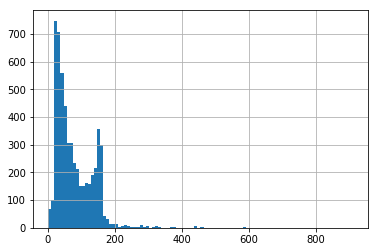

In [0]:
messages['Length'].hist(bins = 100)

In [0]:
messages['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [0]:
messages[messages['Length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd700e8edd8>,
      dtype=object)

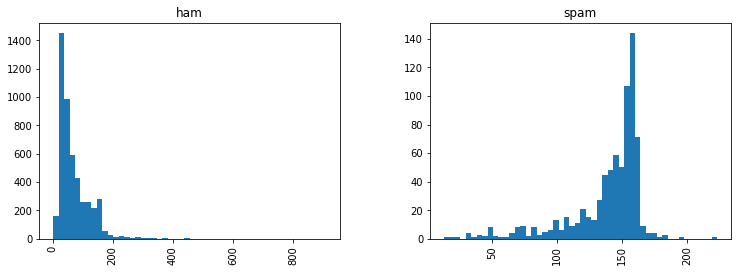

In [0]:
messages.hist(column ='Length', by='label', bins=50, figsize=(12,4))

In [0]:
messages[messages['label'] == 'ham']['Length'].mean()


71.48248704663213

In [0]:
messages[messages['label'] == 'spam']['Length'].mean()

138.6706827309237

From the graph, X axis represents the length of the message and Y axis represents the number of messages that have a certain message length.

We can see that spam messages tend to be longer than ham messages where they are averaged at around 138 words while ham masseges averaged at around 71 words.

In [0]:
from nltk.corpus import stopwords
import string

In [0]:
def text_processing(sms):
  '''
  1. Remove punctuation
  2. Remove stop words
  3. Return list of clean text words
  '''
  
  no_punctuation = [char for char in sms if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [0]:
messages['message'].head(5).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

**VECTORIZATION**

We have the messages as lists of tokens now, next, for working with SciKit Learn, the messages need to be converted into vectors.

we'll do that in 3 steps using the bag-of-words model:

1. Count how many times does a word occur in each message (term frequency)
2. Weigt the counts so that frequent tokens get lower weight (inverse document frequency)
3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow_transformer = CountVectorizer(analyzer = text_processing).fit(messages['message'])

In [0]:
print(len(bow_transformer.vocabulary_))

11425


In [0]:
sms4 = messages['message'][3]
print(sms4)

U dun say so early hor... U c already then say...


In [0]:
bow4 = bow_transformer.transform([sms4])

In [0]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [0]:
print(bow4.shape)

(1, 11425)


In [0]:
bow_transformer.get_feature_names()[9554]

'say'

In [0]:
messages_bow = bow_transformer.transform(messages['message'])

In [0]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [0]:
messages_bow.nnz

50548

In [0]:
sparsity = (100.0* messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparsity: {}'.format(sparsity))

Sparsity: 0.07940295412668218


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [0]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [0]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [0]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [0]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [0]:
messages['label'][3]

'ham'

In [0]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [0]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'], messages['label'], test_size = 0.3)

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [0]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fd700ac90d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
predictions = pipeline.predict(msg_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1442
        spam       1.00      0.67      0.81       230

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



We can see that our model has the accuracy of 96% 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [0]:
pipeline.fit(msg_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fd700ac90d0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [0]:
predictions = pipeline.predict(msg_test)

In [0]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       0.98      0.77      0.86       230

    accuracy                           0.97      1672
   macro avg       0.97      0.88      0.92      1672
weighted avg       0.97      0.97      0.96      1672



We can see that the accuracy of our model when using the Random Forest Classifier is 97%, which is higher than Multinomial Naive Bayes